In [14]:
from dotenv import load_dotenv
import os

load_dotenv(verbose=True)
key = os.getenv('OPENAI_API_KEY')

In [1]:
from langgraph.graph import StateGraph, START, END
from typing import Annotated, TypedDict

from IPython.display import Image, display

In [2]:
class MyState(TypedDict):                       # 그래프 상태를 정의하는 클래스
    counter: int

In [3]:
def increment(state):                           # counter를 증가시키는 노드 함수            
    answer = state['counter'] + 1
    print('=' * 50)
    print(f'counter: {answer}')
    print('=' * 50)

    return {'counter': answer}

In [4]:
graph = StateGraph(MyState)                     # StateGraph 객체 생성

In [5]:
graph.add_node('increment', increment)          # increment 노드 추가          

In [6]:
graph.add_edge(START, 'increment')              # START에서 'increment' 노드로 엣지 추가

In [7]:
graph.add_edge('increment', END)                # 'increment' 노드에서 END 노드로 엣지 추가

In [8]:
app = graph.compile()                           # 그래프 컴파일

In [9]:
from graph_imgae.draw_grpah_image_png import save_graph_image

save_graph_image(app, filename="state_graph.png")

그래프 이미지가 'd:\project_2025\project_2025_langchain\17_langGraph\01_core_features\image\state_graph.png' 경로에 저장되었습니다


In [10]:
# def save_graph_image(app, filename="langgraph_state_graph.png"):
#     png_data = app.get_graph().draw_mermaid_png()

#     with open(filename, "wb") as f:
#         f.write(png_data)
    
#     print(f"그래프 이미지가 {filename} 파일로 저장되었습니다")

# save_graph_image(app, "my_state_graph.png")  

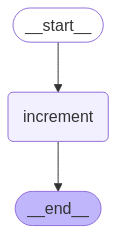

In [11]:
display(Image(app.get_graph().draw_mermaid_png()))

In [12]:
result = app.invoke({'counter': 0})             # 그래프 실행

counter: 1


In [13]:
print(result)

{'counter': 1}
